# THE SPARKS FOUNDATION

### Data Science & Business Analytics Internship Grip Feb 2021

### Task 1 :Predict the percentage of a student based on the number of the study hours

### Author :Shiwangi Jhawar

** This task involves a simple linear regression model with two variables and the prediction of scores based on the studyhours.

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### plotting the distribution of scores obtained vs number of hours studied

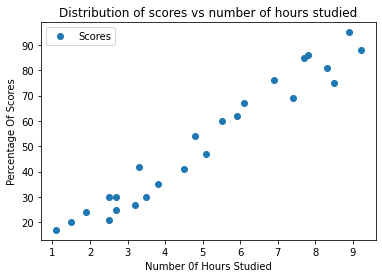

In [5]:
data.plot('Hours','Scores',style='o')
plt.title("Distribution of scores vs number of hours studied")
plt.xlabel("Number 0f Hours Studied")
plt.ylabel("Percentage Of Scores")
plt.show()

### The graph shows a positive linear relation between number of hours studied and percentage of scores.

### preparing the data

In [6]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train
y_train
x_test
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [13]:
from sklearn.linear_model import LinearRegression  
regr= LinearRegression()  
regr.fit(x_train,y_train) 

LinearRegression()

### obtaining the regression equation

In [16]:
a=regr.intercept_
a

2.018160041434683

In [17]:
b=regr.coef_
b

array([9.91065648])

In [18]:
regr_eqn=a+(b*x_train)

### plotting the regression line 

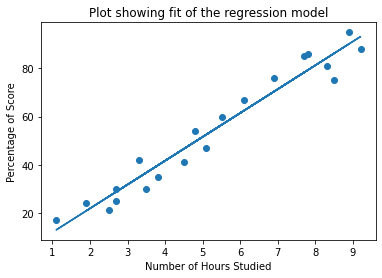

In [19]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regr_eqn)
plt.title("Plot showing fit of the regression model")
plt.ylabel("Percentage of Score")
plt.xlabel("Number of Hours Studied")
plt.show()

### Making predictions

In [21]:
scores_pred=regr.predict(x_test)
scores_pred


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### comparing actual and predicted data 

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': scores_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### visualisation of the regression model for the test data

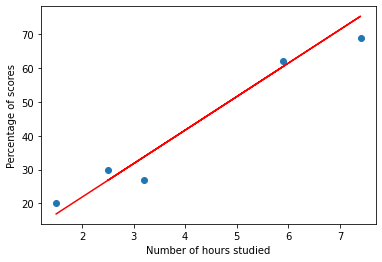

In [23]:
regr_eqn=a+(b*x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,regr_eqn,color="red")
plt.ylabel("Percentage of scores")
plt.xlabel("Number of hours studied")
plt.show()

### Evaluating the model 

In [24]:
from sklearn import metrics
metrics.r2_score(scores_pred,y_test)

0.9546785947197246

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mean_absolute_error(scores_pred,y_test)

4.183859899002975

### The predicted score if a student studies 9.25 hours per day will be: 

In [29]:
print(regr.predict([[9.25]]))


[93.69173249]
